# Linear Regression with SciKit-Learn

We examined how to create a very simple best-fit line, and here we greatly expanded our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features.

## Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [49]:
df = pd.read_csv("Advertising.csv")

In [50]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Expanding the Questions

Previously, we explored **'Is there a relationship between *total* advertising spend and *sales*?'** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV, Radio, and Newspaper) and sales?**

## Multiple Features (N-Dimensional)

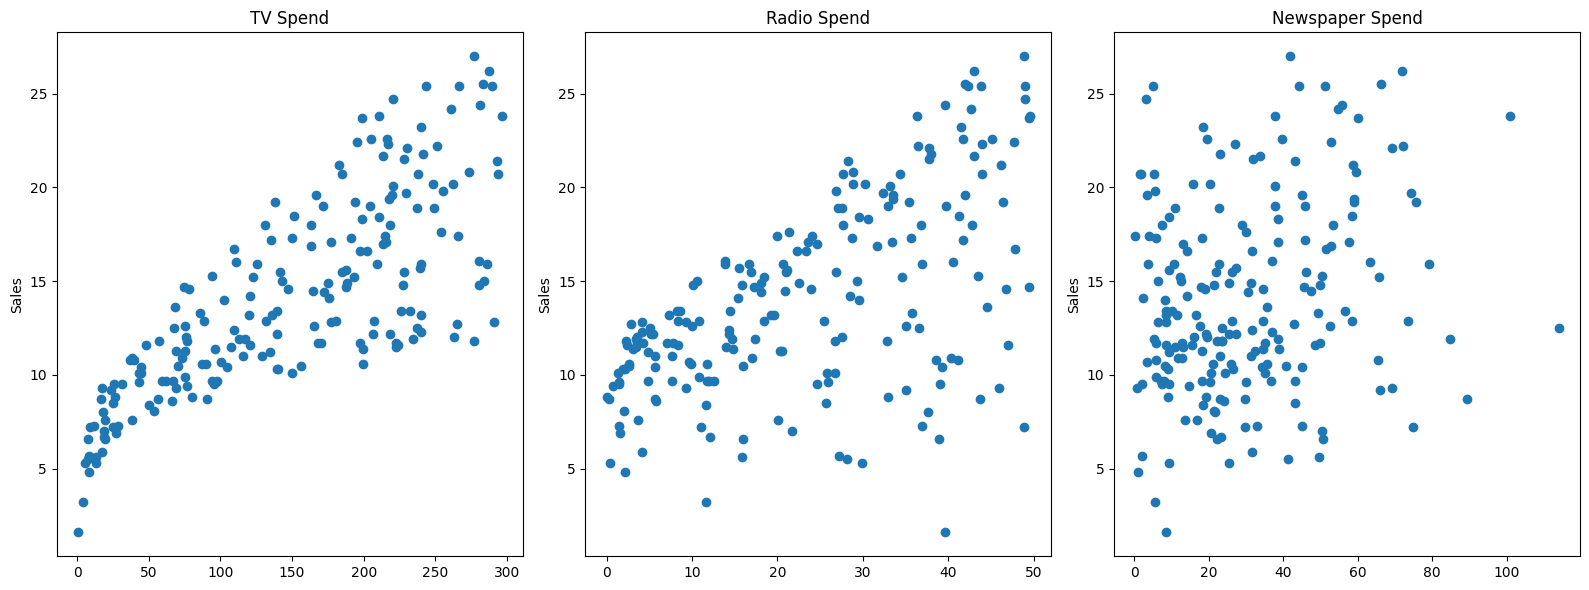

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")

plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/br/pq4r4jdj7n370js8hxvml1vm0000gn/T/ipykernel_10008/2494024580.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


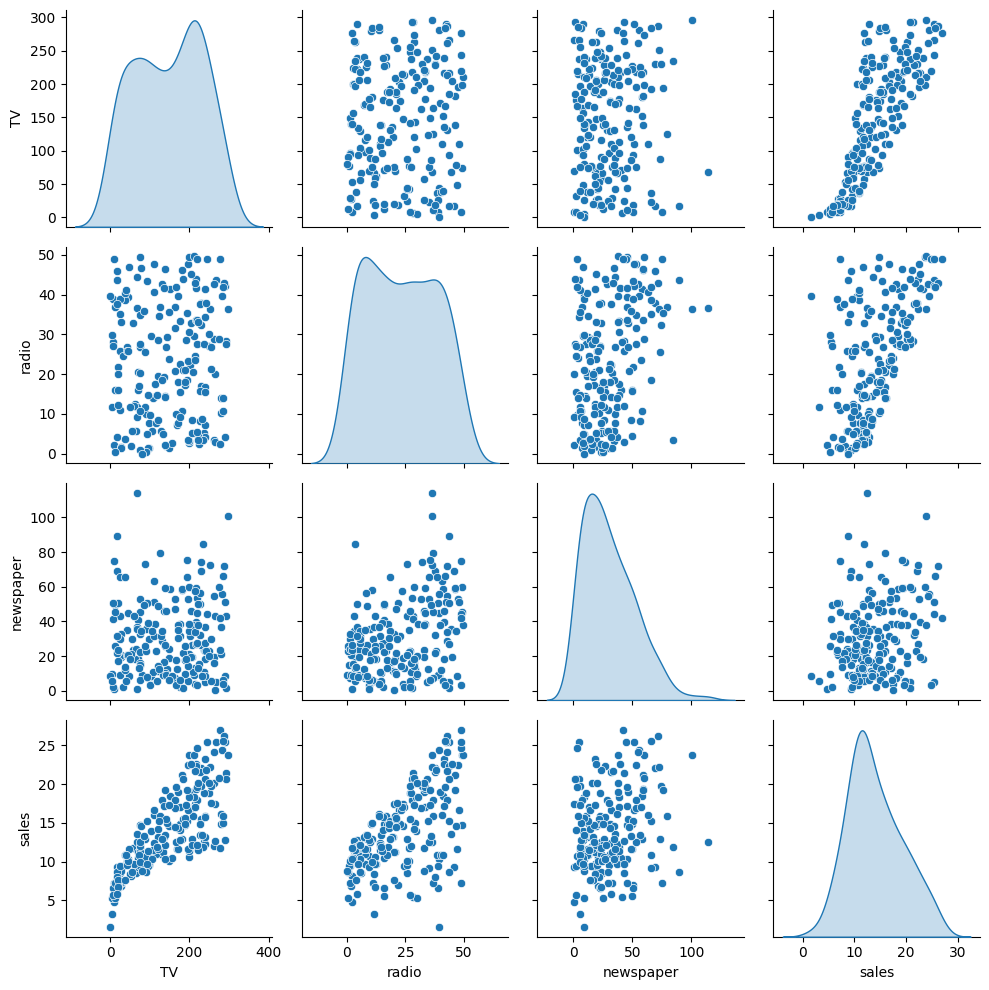

In [52]:
# Relationships between features
sns.pairplot(df, diag_kind='kde')

plt.tight_layout();

## Creating the architecture of Linear Regression

In [112]:
X = df.drop('sales',axis=1)   # drop the 'sales' column
#X = df['TV'] + df['radio'] + df['newspaper']
#X = df['TV']

y = df['sales'] 

In [113]:
X = X.to_numpy()
y = y.to_numpy()

## Train | Test **Split**

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
# random_state: [to get the same data on each execution]
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
X_train.shape[1]

3

In [118]:
X_train = X_train.reshape(140, X_train.shape[1])

In [119]:
X_test = X_test.reshape(60, X_train.shape[1])

In [120]:
y_train.shape

(140,)

In [121]:
y_test.shape

(60,)

## Scaling the Data

In [126]:
mean = X_train.mean(axis=0)
var = X_train.var(axis=0)
max = X_train.max(axis=0)
min = X_train.min(axis=0)

In [127]:
min

array([0.7, 0. , 1. ])

In [128]:
X_train = (X_train - min)/(max - min)
X_train

array([[0.65099763, 0.37096774, 0.64764765],
       [0.97024011, 0.86693548, 0.70870871],
       [0.26885357, 0.        , 0.08208208],
       [0.61515049, 0.93145161, 0.57757758],
       [0.74974636, 0.08669355, 0.48848849],
       [0.84612783, 0.7358871 , 0.71371371],
       [0.63273588, 0.42540323, 0.08508509],
       [0.26208996, 0.94354839, 0.33533534],
       [0.42272574, 0.74395161, 0.78278278],
       [0.44098749, 0.86290323, 0.27927928],
       [0.79066622, 0.06854839, 0.83883884],
       [0.20831924, 0.25403226, 0.17317317],
       [0.96482922, 0.28024194, 0.02702703],
       [0.25600271, 0.01612903, 0.13813814],
       [0.32735881, 0.15322581, 0.06206206],
       [0.72945553, 0.84072581, 0.38638639],
       [0.2874535 , 0.72177419, 0.48348348],
       [0.82008793, 0.98790323, 0.43343343],
       [0.02231992, 0.56653226, 0.4044044 ],
       [0.78254988, 0.1733871 , 0.07707708],
       [0.94690565, 0.28024194, 0.36036036],
       [0.44301657, 0.37096774, 0.33633634],
       [0.

In [129]:
X_test = (X_test - min)/(max - min)

## Creating a Model (Estimator)

In [130]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iter=5000):
        self.lr = lr
        self.n_iter = n_iter
        self.W = None
        self.b = None

    def fit(self, X, y):
        N, m = X.shape
        self.W = np.zeros(m)
        self.b = 0

        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.W) + self.b
            self.W += (self.lr/N)*np.dot(X.T, (y - y_pred))
            self.b += (self.lr/N)*np.sum(y - y_pred)
        
    def predict(self, X):
        y_hat = np.dot(X, self.W) + self.b
        return y_hat

In [133]:
regressor = LinearRegression(lr=0.001, n_iter=1000)

### Fit & Train the Model on the training data

In [134]:
regressor.fit(X_train, y_train)



# Understanding and utilizing the Regressor

-----

## Evaluation on the Test Set

### Metrics

#### The three most common evaluation metrics for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

#### Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions** as we want to minimize them.

### Calculate Performance on Test Set

To fairly evaluate our model, we get performance metrics on the test set (the data the model has never seen before).

In [135]:
# Only pass in test features
# The model predicts y hat
# We can then compare these results to the true y test label value

y_pred = regressor.predict(X_test)

In [136]:
y_pred

array([12.95283666, 12.97983638, 10.83770255, 13.47961852,  9.37231054,
        8.96214814, 13.47223856, 12.33966687,  9.3602137 , 13.68100512,
       10.92721946, 10.80875745, 10.79965145, 15.13257632, 14.29829617,
       10.07698804, 11.55725409,  8.61718169,  8.9852721 , 14.01657785,
        9.17028086, 13.45346067, 15.85298659, 15.41869878,  8.6959122 ,
       10.91934766, 13.5320049 ,  9.71401539, 10.57153916, 12.34432307,
       11.51377354, 13.85554809,  9.51410547,  9.47311449, 13.06351334,
        9.15391222,  9.72601847,  8.88690186, 11.01102273,  9.64384676,
       13.36869871,  9.75838199, 10.38902341, 10.03306024, 10.66074044,
        9.97354373,  9.56159135, 12.67562028, 11.77645242, 14.78680123,
       11.68940835, 11.26059656, 12.3801992 ,  9.94490367, 10.57960878,
        8.01357096, 14.47585394, 10.87619685, 12.4709406 , 12.01267221])

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  # MAE & MSE

In [138]:
MAE = mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)

RMSE = np.sqrt(MSE)

In [139]:
MAE

2.995464160200226

In [140]:
MSE

16.929555253573284

In [141]:
RMSE

4.11455407712346

In [142]:
df['sales'].mean()

14.0225

#### Accuracy

In [143]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [144]:
accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

Accuracy: 0.823125970710963


**Are these values good enough?**

### Plotting Residuals

It's also important to plot the residuals and check for normal distribution, this helps understand if the Linear Regression was a valid model choice.

In [163]:
# If our model was perfect, these would all be zeros

test_res = y_test - y_pred

Text(0, 0.5, 'Error')

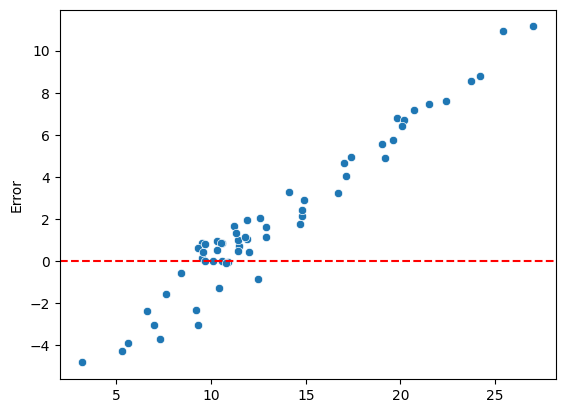

In [164]:
sns.scatterplot(x=y_test, y=test_res)

plt.axhline(y=0, color='r', linestyle='--')

plt.ylabel('Error')

In [165]:
len(test_res)

60

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


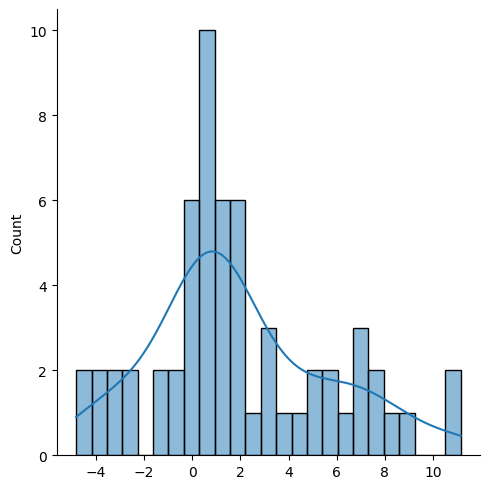

In [166]:
sns.displot(test_res, bins=25, kde=True)

We cannot certainly say that normality is a reasonable approximation. We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [167]:
import scipy as sp

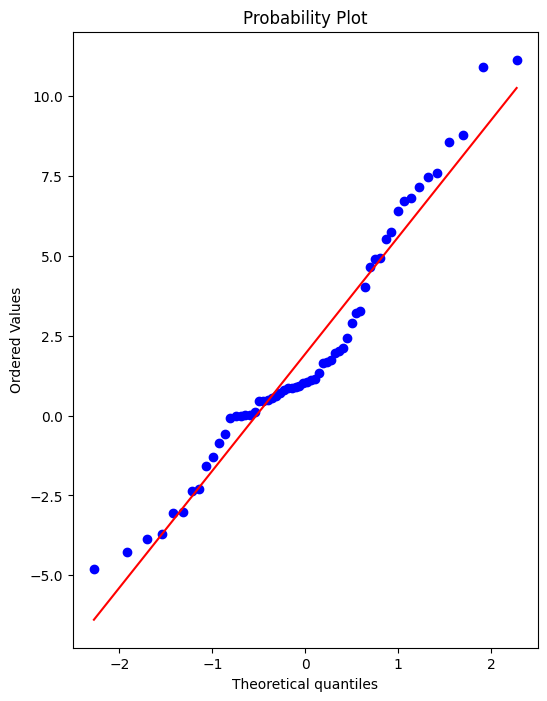

In [168]:
# Create a figure and axis to plot on

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot returns the raw values if needed,
# We just want to see the plot, so we assign these values to _ (There is no need for these values)

_ = sp.stats.probplot(test_res,plot=ax)

-----------
---

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain it on all our data. (If we were not satisfied, we could update parameters or choose another model, which will be discussed later on).

In [170]:
final_model = LinearRegression(lr=0.001, n_iter=1000)

In [174]:
min = X.min(axis=0)
max = X.max(axis=0)

In [175]:
X = (X - min) / (max - min)

In [176]:
final_model.fit(X,y)

Note how it may not make sense to recalculate RMSE metrics here, since the model has already seen all the data, it is not a fair judgment of performance to calculate RMSE on data it has already seen, thus the purpose of the previous examination of the test performance.

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [177]:
y_hat = final_model.predict(X)

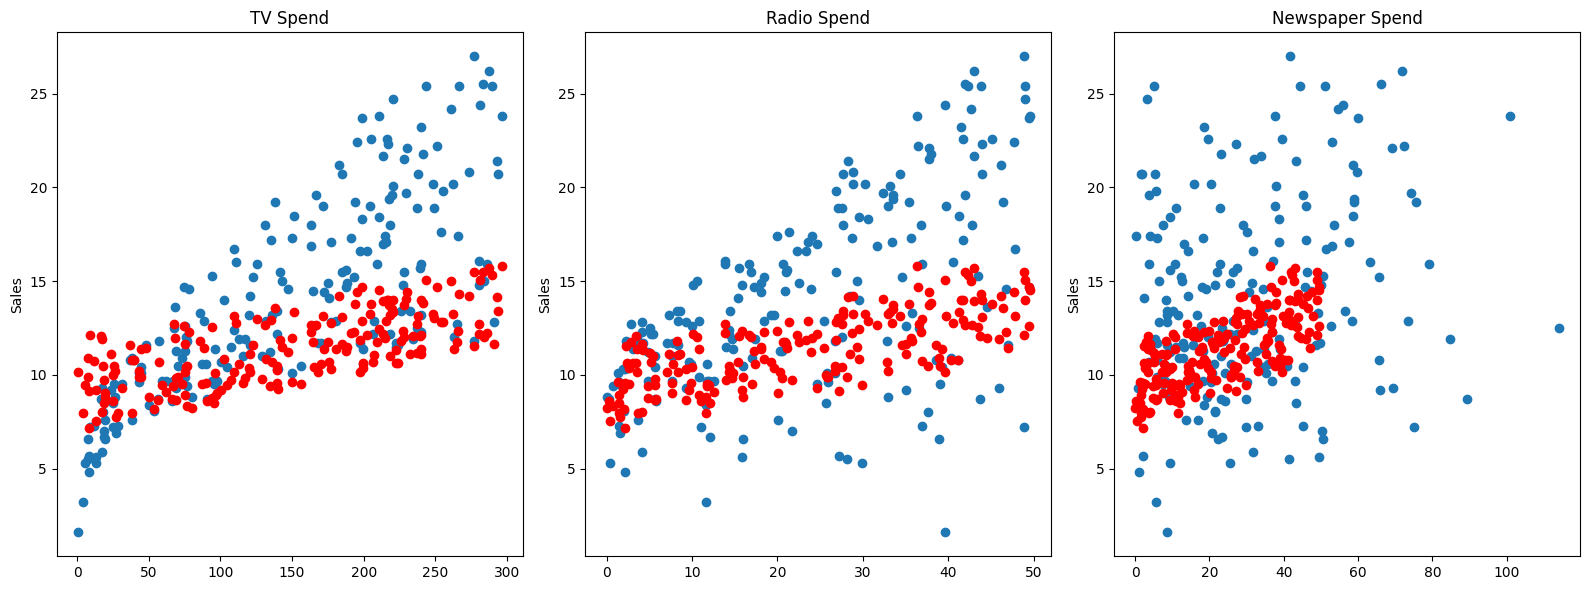

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')

axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')

axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')

axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")

plt.tight_layout();

### Residuals

Should be normally distributed

In [179]:
residuals = y_hat - y

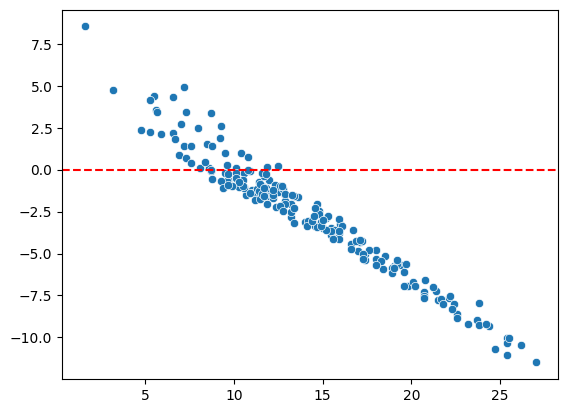

In [180]:
sns.scatterplot(x=y, y=residuals)

plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [182]:
final_model.W

array([4.35370967, 3.87852729, 1.96008775])

In [184]:
df.columns[:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [185]:
coeff_df = pd.DataFrame(final_model.W, df.columns[:-1], columns=['Coefficient'])
coeff_df

,Coefficient
TV,4.353710
radio,3.878527
newspaper,1.960088


#### Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case, 1000s of units. 
* This basically means that for every $1000 dollars spent on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case, 1000s of units. 
* This basically means that for every $1000 dollars spent on Radio Ads, we could expect 188 more units sold.
----
----

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper spending is associated with a **decrease** in sales of  0.001 "sales units", in this case, 1000s of units. 
* This basically means that for every $1000 dollars spent on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

**Note. In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in many datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for the number of bedrooms and a feature of total area like square footage. In this case, it would make more sense to *normalize* the data, to compare features and results.** 

In [186]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [187]:
campaign = [[149,22,12]]

In [188]:
expected_result = final_model.predict(campaign)
expected_result

array([764.44742521])

**How accurate is this prediction? No real way to know! We only truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

-----

## Model Persistence (Saving and Loading a Model)

In [189]:
from joblib import dump, load

In [190]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [191]:
loaded_model = load('sales_model.joblib')

In [192]:
loaded_model.predict(campaign)

array([764.44742521])

## Further Exploration

### Is this the best possible performance? Its a simple model still. We are going to expand on the linear regresion model by taking a further look at regularization.

-------
--------